In [3]:

from Utilities import *


# SET: test for energy stock and deltas+

# i) Delta water: list of water deltas
delta_water_list = [-10, -5, 0, 5, 10]

# ii) Delta food: list of food deltas
delta_food_list = [-10, -5, 0, 5, 10]

# iii) Initial stock of water and food 
initial_water = 50
initial_food = 50



# iv) Calculate and print energy stock for each combination of deltas
E_0 = ENERGY_stock(initial_food, initial_water)

print(f"Initial Energy Stock: {E_0} with Water: {initial_water}, Food: {initial_food}")
for delta_water in delta_water_list:
    for delta_food in delta_food_list:
        initial_water = 50
        initial_food = 50

        E_0 = ENERGY_stock(initial_food, initial_water)
        
        E_1_1 = ENERGY_act(E_0,initial_food, initial_water, delta_food,delta_water)
        print(f"Delta Water: {delta_water}, Delta Food: {delta_food} => Energy Stock: {E_1_1} (Energy act function)")

        initial_water += delta_water
        initial_food += delta_food
        
        E_1 = ENERGY_stock(initial_food, initial_water)
        print(f"Delta Water: {delta_water}, Delta Food: {delta_food} => Energy Stock: {E_1} (Energy stock function)")


        

Initial Energy Stock: 547.72 with Water: 50, Food: 50
Delta Water: -10, Delta Food: -10 => Energy Stock: 438.17600000000004 (Energy act function)
Delta Water: -10, Delta Food: -10 => Energy Stock: 438.18 (Energy stock function)
Delta Water: -10, Delta Food: -5 => Energy Stock: 465.562 (Energy act function)
Delta Water: -10, Delta Food: -5 => Energy Stock: 464.76 (Energy stock function)
Delta Water: -10, Delta Food: 0 => Energy Stock: 492.94800000000004 (Energy act function)
Delta Water: -10, Delta Food: 0 => Energy Stock: 489.9 (Energy stock function)
Delta Water: -10, Delta Food: 5 => Energy Stock: 520.3340000000001 (Energy act function)
Delta Water: -10, Delta Food: 5 => Energy Stock: 513.81 (Energy stock function)
Delta Water: -10, Delta Food: 10 => Energy Stock: 547.72 (Energy act function)
Delta Water: -10, Delta Food: 10 => Energy Stock: 536.66 (Energy stock function)
Delta Water: -5, Delta Food: -10 => Energy Stock: 465.562 (Energy act function)
Delta Water: -5, Delta Food: -10 

Initial Energy Stock: 1095.45 with Water: 50, Food: 50


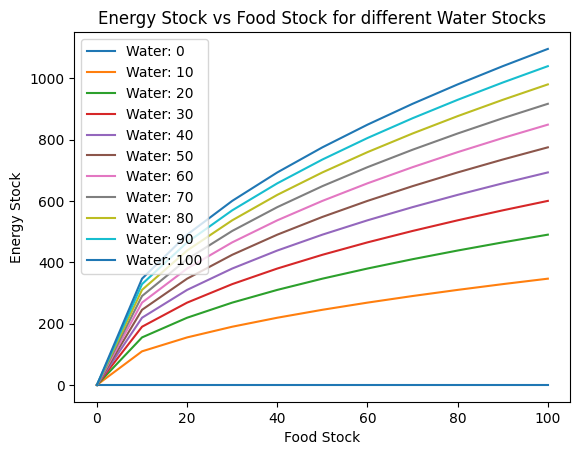

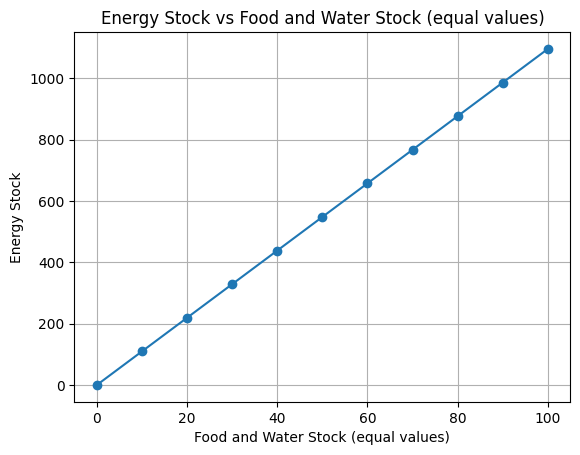

In [9]:
# Vales for Water and Food stocks in order to test ENERGY_stock function decline productivity
water = np.arange(0, 101, 10)
food = np.arange(0, 101, 10)


# iii) Initial stock of water and food 
initial_water = 50
initial_food = 50


print(f"Initial Energy Stock: {E_0} with Water: {initial_water}, Food: {initial_food}")
List_E_equal_food_water = []
Lists = []
for i_water in water:
    List_E_food = []
    for i_food in food:
        E_0 = ENERGY_stock(i_food, i_water)
        List_E_food.append(E_0)
        if i_food == i_water:
            List_E_equal_food_water.append(E_0)
    Lists.append(List_E_food)

# Plot curves
import matplotlib.pyplot as plt
for idx, i_water in enumerate(water):
    plt.plot(food, Lists[idx], label=f'Water: {i_water}')
plt.xlabel('Food Stock')
plt.ylabel('Energy Stock')
plt.title('Energy Stock vs Food Stock for different Water Stocks')
plt.legend()
plt.show()

# Plot energy when food equals water
plt.plot(water, List_E_equal_food_water, marker='o')
plt.xlabel('Food and Water Stock (equal values)')
plt.ylabel('Energy Stock')
plt.title('Energy Stock vs Food and Water Stock (equal values)')
plt.grid()
plt.show()
        

0.5 0.5


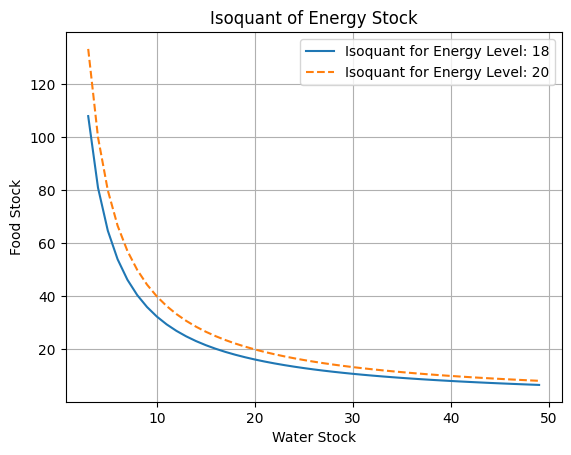

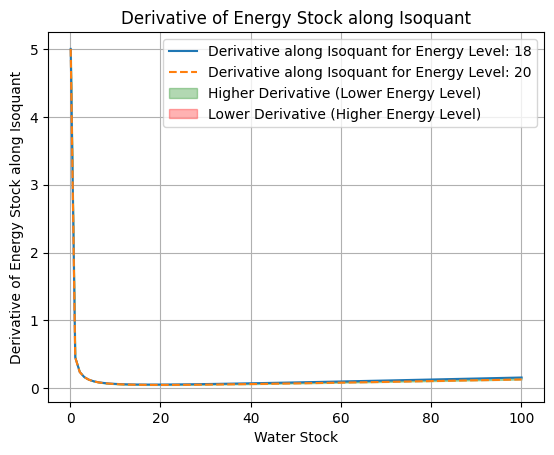

Area where derivative is higher (Lower Energy Level): 1.4836712962962966
Area where derivative is lower (Higher Energy Level): 0.0


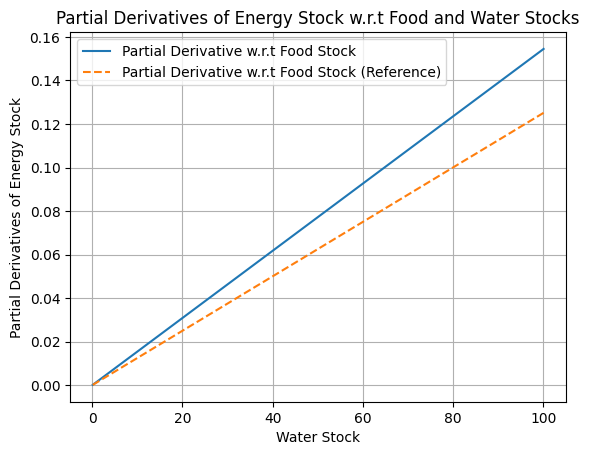

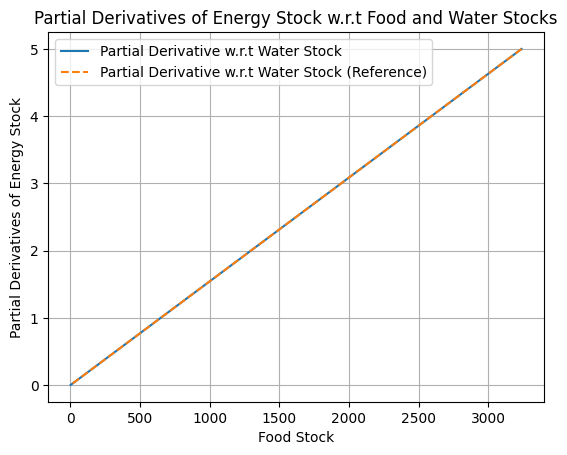

In [34]:
# PLOT isoquants of energy stock
print(FOOD_RELEVANCE, WATER_RELEVANCE)
# SET reference energy level
ENERY_LEVEL_OF_REF = 20
WATER_STOCK_RANGE_REF = np.arange(3, 50, 1)
FOOD_STOCK_RANGE_REF =  (ENERY_LEVEL_OF_REF/WATER_STOCK_RANGE_REF**(WATER_RELEVANCE))**(1/FOOD_RELEVANCE)


# SET PLOT if level inferior or equal to REF
ENERGY_LEVEL_PLOT = ENERY_LEVEL_OF_REF - 2
WATER_STOCK_RANGE = np.arange(3, 50, 1)
FOOD_STOCK_RANGE =  (ENERGY_LEVEL_PLOT/WATER_STOCK_RANGE**(WATER_RELEVANCE))**(1/FOOD_RELEVANCE)

# PLOT isoquant
import matplotlib.pyplot as plt
plt.plot(WATER_STOCK_RANGE, FOOD_STOCK_RANGE, label=f'Isoquant for Energy Level: {ENERGY_LEVEL_PLOT}')
plt.plot(WATER_STOCK_RANGE_REF, FOOD_STOCK_RANGE_REF, label=f'Isoquant for Energy Level: {ENERY_LEVEL_OF_REF}', linestyle='--')
plt.xlabel('Water Stock')
plt.ylabel('Food Stock')
plt.title('Isoquant of Energy Stock')
plt.legend()
plt.grid()
plt.show()


#PLOT now derivative of energy stock function with respect to food and water stocks: Asuming df and dw = 1 unit
# SET reference energy level
df = 1
dw = 1
ENERY_LEVEL_OF_REF = 20
WATER_STOCK_RANGE_REF = np.arange(0.1, 101, 1)
FOOD_STOCK_RANGE_REF =  (ENERY_LEVEL_OF_REF/WATER_STOCK_RANGE_REF**(WATER_RELEVANCE))**(1/FOOD_RELEVANCE)
DERIV_REF_FOOD = FOOD_RELEVANCE*df/(FOOD_STOCK_RANGE_REF)
DERIV_REF_WATER = WATER_RELEVANCE*dw/(WATER_STOCK_RANGE_REF)
DERIV_REF = DERIV_REF_FOOD + DERIV_REF_WATER


# SET PLOT if level inferior or equal to REF
ENERGY_LEVEL_PLOT = ENERY_LEVEL_OF_REF - 2
WATER_STOCK_RANGE = np.arange(0.1, 101, 1)
FOOD_STOCK_RANGE =  (ENERGY_LEVEL_PLOT/WATER_STOCK_RANGE**(WATER_RELEVANCE))**(1/FOOD_RELEVANCE)
DERIV_FOOD = FOOD_RELEVANCE*df/(FOOD_STOCK_RANGE)
DERIV_WATER = WATER_RELEVANCE*dw/(WATER_STOCK_RANGE)
DERIV = DERIV_FOOD + DERIV_WATER




# PLOT derivative along isoquant: Show where  wich of the derivatives is higher
import matplotlib.pyplot as plt

plt.plot(WATER_STOCK_RANGE, DERIV, label=f'Derivative along Isoquant for Energy Level: {ENERGY_LEVEL_PLOT}')
plt.plot(WATER_STOCK_RANGE_REF, DERIV_REF, label=f'Derivative along Isoquant for Energy Level: {ENERY_LEVEL_OF_REF}', linestyle='--')
plt.fill_between(WATER_STOCK_RANGE, DERIV, DERIV_REF, where=(DERIV > DERIV_REF), color='green', alpha=0.3, label='Higher Derivative (Lower Energy Level)')
plt.fill_between(WATER_STOCK_RANGE, DERIV, DERIV_REF, where=(DERIV < DERIV_REF), color='red', alpha=0.3, label='Lower Derivative (Higher Energy Level)')
plt.xlabel('Water Stock')
plt.ylabel('Derivative of Energy Stock along Isoquant')
plt.title('Derivative of Energy Stock along Isoquant')
plt.legend()
plt.grid()
plt.show()

#Print final areas: Do not use np.trapz 
area_higher_deriv = np.sum(np.abs(DERIV - DERIV_REF)[DERIV > DERIV_REF]) * (WATER_STOCK_RANGE[1] - WATER_STOCK_RANGE[0])
area_lower_deriv = np.sum(np.abs(DERIV - DERIV_REF)[DERIV < DERIV_REF]) * (WATER_STOCK_RANGE[1] - WATER_STOCK_RANGE[0])
print(f"Area where derivative is higher (Lower Energy Level): {area_higher_deriv}")
print(f"Area where derivative is lower (Higher Energy Level): {area_lower_deriv}")


# Plot partial derivatives with respect to food and water agaist reference 
plt.plot(WATER_STOCK_RANGE, DERIV_FOOD, label='Partial Derivative w.r.t Food Stock')

plt.plot(WATER_STOCK_RANGE, DERIV_REF_FOOD, label='Partial Derivative w.r.t Food Stock (Reference)', linestyle='--')
plt.xlabel('Water Stock')
plt.ylabel('Partial Derivatives of Energy Stock')
plt.title('Partial Derivatives of Energy Stock w.r.t Food and Water Stocks')
plt.legend()
plt.grid()
plt.show()


plt.plot(FOOD_STOCK_RANGE, DERIV_WATER, label='Partial Derivative w.r.t Water Stock')

plt.plot(FOOD_STOCK_RANGE, DERIV_REF_WATER, label='Partial Derivative w.r.t Water Stock (Reference)', linestyle='--')
plt.xlabel('Food Stock')
plt.ylabel('Partial Derivatives of Energy Stock')
plt.title('Partial Derivatives of Energy Stock w.r.t Food and Water Stocks')
plt.legend()
plt.grid()
plt.show()


